In [42]:
%env CUDA_VISIBLE_DEVICES= 2
import os
os.environ['HF_HOME'] = '/home/sofia/cache_custom'

env: CUDA_VISIBLE_DEVICES=2


In [43]:
pwd

'/home/sofia/multilingual/OTHERS'

In [44]:
import os

# read all files starting with "all_others_gemma3" in the current directory
files = [f for f in os.listdir('.') if f.startswith('all_oth')]
files

['all_others_gemma3_labelled_2025-05-01_10-29-23_guj_mar.csv',
 'all_others_g3l_2025-05-06_09-47-32_hin9780.csv',
 'all_others_gemma3_labelled_2025-04-29_20-03-19Mal.csv',
 'all_others_gemma3_labelled_2025-04-29_17-05-08_knd_tel.csv',
 'all_others_gemma3_labelled_2025-04-29_20-03-19.csv',
 'all_others_gemma3_labelled_2025-04-29_15-51-48_od_pj.csv',
 'all_others_gemma3_labelled_2025-05-07_16-35-41_mal_Mlym_last.csv',
 'all_others_gemma3_labelled_2025-04-29_20-03-19Beng.csv',
 'all_oth_gm3l__2025-05-06_09-47-32_mal_Mlym_8520.csv',
 'all_others_gemma3_labelled_2025-05-06_09-52-22_hin_Deva.csv',
 'all_others_gemma3_labelled_2025-04-30_15-02-27Taml.csv',
 'all_others_gemma3_labelled_2025-05-02_08-10-11_hin_beng_malm.csv']

In [45]:
# read all files stated above and store them in df named df_data
import pandas as pd
df_data=None
# df_data = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
for f in files:
    print(f)
    if df_data is None:
        df_data = pd.read_csv(f, header =0) 
    else:
        df_data = pd.concat([df_data, pd.read_csv(f, header =0)], ignore_index=True)
df_data.head(5)
print("cols:",df_data.columns)
print("shape::", df_data.shape)

all_others_gemma3_labelled_2025-05-01_10-29-23_guj_mar.csv
all_others_g3l_2025-05-06_09-47-32_hin9780.csv
all_others_gemma3_labelled_2025-04-29_20-03-19Mal.csv
all_others_gemma3_labelled_2025-04-29_17-05-08_knd_tel.csv
all_others_gemma3_labelled_2025-04-29_20-03-19.csv
all_others_gemma3_labelled_2025-04-29_15-51-48_od_pj.csv
all_others_gemma3_labelled_2025-05-07_16-35-41_mal_Mlym_last.csv
all_others_gemma3_labelled_2025-04-29_20-03-19Beng.csv
all_oth_gm3l__2025-05-06_09-47-32_mal_Mlym_8520.csv
all_others_gemma3_labelled_2025-05-06_09-52-22_hin_Deva.csv
all_others_gemma3_labelled_2025-04-30_15-02-27Taml.csv
all_others_gemma3_labelled_2025-05-02_08-10-11_hin_beng_malm.csv
cols: Index(['eng_text', 'tgt_lang', 'tgt_lang_text', 'eng_reln', 'gemma_3_12b'], dtype='object')
shape:: (79173, 5)


In [46]:
df_data['tgt_lang'].value_counts()

tgt_lang
mal_Mlym    25031
hin_Deva    22216
ben_Beng     7917
tel_Telu     4735
kan_Knda     4612
guj_Gujr     4314
mar_Deva     3860
tam_Taml     3351
pan_Guru     2364
ory_Orya      773
Name: count, dtype: int64

In [47]:
# for hin, mal, ben:
# drop the duplicate rows in cols 'eng_text'+'tgt_lang' where  gemma_3_12b ==U is removed

# Step 1: Find all tgt_lang values that are duplicated
duplicated_tgt = df_data[df_data.duplicated(subset=['tgt_lang'], keep=False)]

# Step 2: From those duplicates, drop rows where label is 'U'
filtered_duplicates = duplicated_tgt[df_data['gemma_3_12b'] != 'U']

# Step 3: Get rows that were not part of duplicated tgt_lang values (keep them as-is)
non_duplicated = df_data[~df_data['tgt_lang'].isin(duplicated_tgt['tgt_lang'])]

# Step 4: Concatenate the cleaned duplicate group with the non-duplicates
df_cleaned = pd.concat([filtered_duplicates, non_duplicated], ignore_index=True)

df_cleaned['tgt_lang'].value_counts()

tgt_lang
hin_Deva    12646
mal_Mlym     7988
ben_Beng     7917
tel_Telu     4735
kan_Knda     4612
guj_Gujr     4314
mar_Deva     3860
tam_Taml     3351
pan_Guru     2364
ory_Orya      773
Name: count, dtype: int64

In [48]:
# df_mal = df_cleaned[df_cleaned['tgt_lang'] == 'mal_Mlym']
# df_mal.shape

In [49]:
# df_mal.head(20)

In [50]:
# df_mal.tail(20)

In [51]:
# df_mal.to_csv('mal_Mlym.csv', index=False)


In [52]:
df_cleaned.describe()

,eng_text,tgt_lang,tgt_lang_text,eng_reln,gemma_3_12b
count,52560,52560,52560,52560,52560
unique,34886,10,41665,9,4
top,Police has registered a criminal case against ...,hin_Deva,"""""""ശ്രദ്ധേയവും സ്നേഹമുള്ളതുമായ ഭർത്താവ്, അച്ഛൻ...",uncle,X
freq,182,12646,67,9927,42553


In [53]:
df_cleaned['gemma_3_12b'].value_counts()    

gemma_3_12b
X    42553
B     5627
M     3840
F      540
Name: count, dtype: int64

In [54]:
df_cleaned.columns

Index(['eng_text', 'tgt_lang', 'tgt_lang_text', 'eng_reln', 'gemma_3_12b'], dtype='object')

In [55]:
df_cleaned.groupby(['tgt_lang','eng_reln', 'gemma_3_12b']).size()


tgt_lang  eng_reln        gemma_3_12b
ben_Beng  aunt            F                3
                          M               24
                          X              445
          brother-in-law  B                8
                          F                4
                                        ... 
tel_Telu  sister-in-law   X              105
          uncle           B               15
                          F               31
                          M                7
                          X              811
Length: 266, dtype: int64

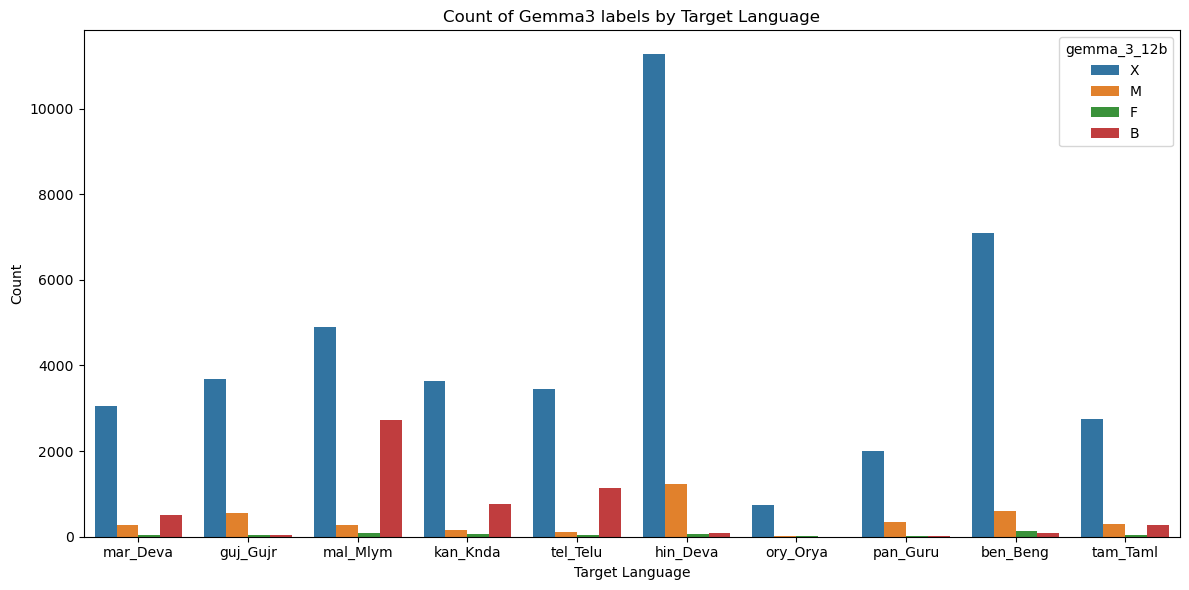

In [56]:
# show the above info in plot bar
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))
# Create a bar plot
sns.countplot(data=df_cleaned, x='tgt_lang', hue='gemma_3_12b')
# Rotate x-axis labels for better readability
plt.xticks(
    # rotation=45
    )
# Set the title and labels
plt.title('Count of Gemma3 labels by Target Language')
plt.xlabel('Target Language')
plt.ylabel('Count')
# Show the legend
plt.legend(title='gemma_3_12b')
# Show the plot
plt.tight_layout()
plt.show()


In [57]:
#  from this : df_cleaned.groupby(['tgt_lang', 'gemma_3_12b']).size() ignore the X label and save data as a dict
df_grouped = df_cleaned.groupby(['tgt_lang','eng_reln', 'gemma_3_12b']).size().reset_index(name='count')
df_grouped
# Convert the DataFrame to a dictionary
# df_dict = df_grouped.set_index(['tgt_lang']).T.to_dict()
# df_dict


,tgt_lang,eng_reln,gemma_3_12b,count
0,ben_Beng,aunt,F,3
1,ben_Beng,aunt,M,24
2,ben_Beng,aunt,X,445
3,ben_Beng,brother-in-law,B,8
4,ben_Beng,brother-in-law,F,4
...,...,...,...,...
261,tel_Telu,sister-in-law,X,105
262,tel_Telu,uncle,B,15
263,tel_Telu,uncle,F,31
264,tel_Telu,uncle,M,7


In [58]:
# make dict  from df_grouped outer keys = tgt_lang,inner keys = eng_reln, inner keys = gemma_3_12b and inner values = count
df_dict = {}
for _, row in df_grouped.iterrows():
    tgt_lang = row['tgt_lang']
    eng_reln = row['eng_reln']
    gemma_3_12b = row['gemma_3_12b']
    count = row['count']
    
    if tgt_lang not in df_dict:
        df_dict[tgt_lang] = {}
    if eng_reln not in df_dict[tgt_lang]:
        df_dict[tgt_lang][eng_reln] = {}
        
    if gemma_3_12b != 'X' and gemma_3_12b != 'B':
        if gemma_3_12b == 'F':
            gemma_3_12b = 'Matriarch'
        if gemma_3_12b == 'M':
            gemma_3_12b = 'Patriarch'

        df_dict[tgt_lang][eng_reln][gemma_3_12b] = count
# Print the dictionary
(df_dict)

{'ben_Beng': {'aunt': {'Matriarch': 3, 'Patriarch': 24},
  'brother-in-law': {'Matriarch': 4},
  'cousin': {'Matriarch': 6, 'Patriarch': 26},
  'grandfather': {'Matriarch': 108, 'Patriarch': 207},
  'grandmother': {'Matriarch': 11, 'Patriarch': 180},
  'nephew': {'Patriarch': 10},
  'niece': {'Patriarch': 30},
  'sister-in-law': {'Patriarch': 30},
  'uncle': {'Matriarch': 8, 'Patriarch': 88}},
 'guj_Gujr': {'aunt': {'Patriarch': 8},
  'brother-in-law': {'Matriarch': 23, 'Patriarch': 7},
  'cousin': {'Patriarch': 68},
  'grandfather': {'Matriarch': 2, 'Patriarch': 51},
  'grandmother': {'Matriarch': 2, 'Patriarch': 45},
  'nephew': {'Patriarch': 270},
  'niece': {'Matriarch': 1, 'Patriarch': 2},
  'sister-in-law': {'Patriarch': 21},
  'uncle': {'Matriarch': 8, 'Patriarch': 78}},
 'hin_Deva': {'aunt': {'Matriarch': 2, 'Patriarch': 18},
  'brother-in-law': {'Matriarch': 22},
  'cousin': {'Matriarch': 4, 'Patriarch': 50},
  'grandfather': {'Matriarch': 9, 'Patriarch': 57},
  'grandmother':

In [59]:
trainset_counts={
    'tam_Taml': {'uncle': {'Matriarch': 1107, 'Patriarch': 11}, 'aunt': {'B': 207, 'Matriarch': 24}, 'grandfather': {'B': 1234}, 'grandmother': {'B': 294}, 'brother-in-law': {'Matriarch': 34}, 'nephew': {'Matriarch': 1, 'Patriarch': 4}, 'niece': {'Matriarch': 2, 'Patriarch': 8}, 'sister-in-law': {'Matriarch': 10, 'Patriarch': 13}, 'cousin': {'Matriarch': 8, 'Patriarch': 43}}
,
'mar_Deva': {'uncle': {'Matriarch': 160, 'Patriarch': 265}, 'aunt': {'Matriarch': 48, 'Patriarch': 74}, 'grandfather': {'B': 966}, 'grandmother': {'B': 392}, 'brother-in-law': {'Matriarch': 47, 'Patriarch': 10}, 'nephew': {'Matriarch': 72, 'Patriarch': 2}, 'niece': {'Matriarch': 70, 'Patriarch': 33}, 'sister-in-law': {'Matriarch': 23, 'Patriarch': 24}, 'cousin': {'Matriarch': 6, 'Patriarch': 135}}
,
'ory_Orya': {'uncle': {'Matriarch': 95, 'Patriarch': 23}, 'aunt': {'Matriarch': 9, 'Patriarch': 4}, 'grandfather': {'Matriarch': 28, 'Patriarch': 129}, 'grandmother': {'Matriarch': 6, 'Patriarch': 107}, 'brother-in-law': {'Matriarch': 7, 'Patriarch': 2}, 'nephew': {'Matriarch': 14, 'Patriarch': 32}, 'niece': {'Matriarch': 9, 'Patriarch': 8}, 'sister-in-law': {'Matriarch': 7, 'Patriarch': 17}, 'cousin': {'Patriarch': 59}}
,
'hin_Deva': {'uncle': {'Matriarch': 619, 'Patriarch': 1894}, 'aunt': {'Matriarch': 241, 'Patriarch': 380}, 'grandfather': {'Matriarch': 169, 'Patriarch': 1702}, 'grandmother': {'Matriarch': 152, 'Patriarch': 1633}, 'brother-in-law': {'Matriarch': 341, 'Patriarch': 129}, 'nephew': {'Matriarch': 53, 'Patriarch': 291}, 'niece': {'Matriarch': 218, 'Patriarch': 627}, 'sister-in-law': {'Matriarch': 87, 'Patriarch': 410}, 'cousin': {'Matriarch': 614, 'Patriarch': 1698}}
,
'kan_Knda': {'uncle': {'Matriarch': 4, 'Patriarch': 896}, 'aunt': {'B': 367}, 'grandfather': {'B': 1188}, 'grandmother': {'B': 1552}, 'brother-in-law': {'Matriarch': 67, 'Patriarch': 12}, 'nephew': {'Patriarch': 4}, 'sister-in-law': {'Patriarch': 60}, 'cousin': {'Matriarch': 23, 'Patriarch': 29}}
,
'pan_Guru': {'uncle': {'Matriarch': 22, 'Patriarch': 124}, 'aunt': {'Matriarch': 55, 'Patriarch': 19}, 'grandfather': {'Matriarch': 25, 'Patriarch': 374}, 'grandmother': {'Matriarch': 103, 'Patriarch': 294}, 'brother-in-law': {'Matriarch': 44}, 'nephew': {'Patriarch': 54}, 'niece': {'Patriarch': 75}, 'sister-in-law': {'Matriarch': 4, 'Patriarch': 11}, 'cousin': {'Matriarch': 111, 'Patriarch': 15}}
,
'tel_Telu': {'uncle': {'Matriarch': 281}, 'aunt': {'B': 9, 'Patriarch': 303}, 'grandfather': {'B': 42}, 'grandmother': {'Matriarch': 553, 'Patriarch': 2}, 'brother-in-law': {'B': 1, 'Matriarch': 39}, 'nephew': {'Matriarch': 6}, 'niece': {'Matriarch': 3, 'Patriarch': 113}, 'sister-in-law': {'Patriarch': 11}, 'cousin': {'Patriarch': 23}}
,
'mal_Mlym': {'uncle': {'B': 519, 'Matriarch': 13}, 'aunt': {'Matriarch': 9}, 'grandfather': {'B': 64}, 'grandmother': {'B': 290}, 'brother-in-law': {'B': 1, 'Matriarch': 2}, 'nephew': {'Matriarch': 27, 'Patriarch': 46}, 'niece': {'Matriarch': 12, 'Patriarch': 11}, 'sister-in-law': {'B': 2, 'Matriarch': 5}, 'cousin': {'B': 273}}
,
'guj_Gujr': {'uncle': {'Matriarch': 95, 'Patriarch': 807}, 'aunt': {'Matriarch': 43, 'Patriarch': 232}, 'grandfather': {'Matriarch': 28, 'Patriarch': 1133}, 'grandmother': {'Matriarch': 32, 'Patriarch': 1037}, 'brother-in-law': {'Matriarch': 54, 'Patriarch': 11}, 'nephew': {'Matriarch': 24, 'Patriarch': 56}, 'niece': {'Matriarch': 18, 'Patriarch': 207}, 'sister-in-law': {'Matriarch': 11, 'Patriarch': 114}, 'cousin': {'Matriarch': 28, 'Patriarch': 5}}
,
'ben_Beng': {'uncle': {'Matriarch': 163, 'Patriarch': 5}, 'grandfather': {'Matriarch': 423, 'Patriarch': 24}, 'grandmother': {'Patriarch': 14}, 'brother-in-law': {'Patriarch': 3}, 'cousin': {'Matriarch': 3, 'Patriarch': 383}}

}
trainset_counts

{'tam_Taml': {'uncle': {'Matriarch': 1107, 'Patriarch': 11},
  'aunt': {'B': 207, 'Matriarch': 24},
  'grandfather': {'B': 1234},
  'grandmother': {'B': 294},
  'brother-in-law': {'Matriarch': 34},
  'nephew': {'Matriarch': 1, 'Patriarch': 4},
  'niece': {'Matriarch': 2, 'Patriarch': 8},
  'sister-in-law': {'Matriarch': 10, 'Patriarch': 13},
  'cousin': {'Matriarch': 8, 'Patriarch': 43}},
 'mar_Deva': {'uncle': {'Matriarch': 160, 'Patriarch': 265},
  'aunt': {'Matriarch': 48, 'Patriarch': 74},
  'grandfather': {'B': 966},
  'grandmother': {'B': 392},
  'brother-in-law': {'Matriarch': 47, 'Patriarch': 10},
  'nephew': {'Matriarch': 72, 'Patriarch': 2},
  'niece': {'Matriarch': 70, 'Patriarch': 33},
  'sister-in-law': {'Matriarch': 23, 'Patriarch': 24},
  'cousin': {'Matriarch': 6, 'Patriarch': 135}},
 'ory_Orya': {'uncle': {'Matriarch': 95, 'Patriarch': 23},
  'aunt': {'Matriarch': 9, 'Patriarch': 4},
  'grandfather': {'Matriarch': 28, 'Patriarch': 129},
  'grandmother': {'Matriarch': 6

In [60]:
# now add df_dict to traineset_counts: if same lang, eng_reln, gemma_3_12b, then add the counts; if new key then add it to respective section.

for lang, eng_reln_dict in df_dict.items():
    if lang not in trainset_counts:
        print("lang not in trainset_counts:", lang)
        trainset_counts[lang] = {}
    for eng_reln, gemma_dict in eng_reln_dict.items():
        if eng_reln not in trainset_counts[lang]:
            print("eng_reln not in trainset_counts[lang]:", eng_reln, lang)
            trainset_counts[lang][eng_reln] = {}
        for gemma_3_12b, count in gemma_dict.items():
            if gemma_3_12b not in trainset_counts[lang][eng_reln]:
                print("gemma_3_12b not in trainset_counts[lang][eng_reln]:", gemma_3_12b, eng_reln, lang)
                trainset_counts[lang][eng_reln][gemma_3_12b] = count
            else:
                trainset_counts[lang][eng_reln][gemma_3_12b] += count

trainset_counts

eng_reln not in trainset_counts[lang]: aunt ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Matriarch aunt ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Patriarch aunt ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Matriarch brother-in-law ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Matriarch grandmother ben_Beng
eng_reln not in trainset_counts[lang]: nephew ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Patriarch nephew ben_Beng
eng_reln not in trainset_counts[lang]: niece ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Patriarch niece ben_Beng
eng_reln not in trainset_counts[lang]: sister-in-law ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Patriarch sister-in-law ben_Beng
gemma_3_12b not in trainset_counts[lang][eng_reln]: Patriarch aunt kan_Knda
gemma_3_12b not in trainset_counts[lang][eng_reln]: Matriarch grandmother kan_Knda
gemma_3_12b not in trainset_counts[lang][eng_reln]: Patr

{'tam_Taml': {'uncle': {'Matriarch': 1124, 'Patriarch': 52},
  'aunt': {'B': 207, 'Matriarch': 30, 'Patriarch': 20},
  'grandfather': {'B': 1234, 'Matriarch': 2, 'Patriarch': 15},
  'grandmother': {'B': 294, 'Matriarch': 13, 'Patriarch': 60},
  'brother-in-law': {'Matriarch': 38, 'Patriarch': 1},
  'nephew': {'Matriarch': 1, 'Patriarch': 50},
  'niece': {'Matriarch': 2, 'Patriarch': 32},
  'sister-in-law': {'Matriarch': 10, 'Patriarch': 51},
  'cousin': {'Matriarch': 12, 'Patriarch': 91}},
 'mar_Deva': {'uncle': {'Matriarch': 164, 'Patriarch': 344},
  'aunt': {'Matriarch': 51, 'Patriarch': 99},
  'grandfather': {'B': 966, 'Matriarch': 2, 'Patriarch': 6},
  'grandmother': {'B': 392, 'Matriarch': 2, 'Patriarch': 7},
  'brother-in-law': {'Matriarch': 62, 'Patriarch': 15},
  'nephew': {'Matriarch': 81, 'Patriarch': 84},
  'niece': {'Matriarch': 71, 'Patriarch': 39},
  'sister-in-law': {'Matriarch': 23, 'Patriarch': 37},
  'cousin': {'Matriarch': 14, 'Patriarch': 177}},
 'ory_Orya': {'uncle

In [61]:
df_cleaned.groupby(['tgt_lang','eng_reln', 'gemma_3_12b']).size()


tgt_lang  eng_reln        gemma_3_12b
ben_Beng  aunt            F                3
                          M               24
                          X              445
          brother-in-law  B                8
                          F                4
                                        ... 
tel_Telu  sister-in-law   X              105
          uncle           B               15
                          F               31
                          M                7
                          X              811
Length: 266, dtype: int64

In [ ]:
# x = df_cleaned[(df_cleaned['tgt_lang'] == 'hin_Deva') & 
#            (df_cleaned['eng_reln'] == 'brother-in-law') & 
#            (df_cleaned['gemma_3_12b'] == 'B')]


# # convert x to csv but not save as a file
# x.to_csv('x.csv', index=False)


In [63]:
trainset_counts

{'tam_Taml': {'uncle': {'Matriarch': 1124, 'Patriarch': 52},
  'aunt': {'B': 207, 'Matriarch': 30, 'Patriarch': 20},
  'grandfather': {'B': 1234, 'Matriarch': 2, 'Patriarch': 15},
  'grandmother': {'B': 294, 'Matriarch': 13, 'Patriarch': 60},
  'brother-in-law': {'Matriarch': 38, 'Patriarch': 1},
  'nephew': {'Matriarch': 1, 'Patriarch': 50},
  'niece': {'Matriarch': 2, 'Patriarch': 32},
  'sister-in-law': {'Matriarch': 10, 'Patriarch': 51},
  'cousin': {'Matriarch': 12, 'Patriarch': 91}},
 'mar_Deva': {'uncle': {'Matriarch': 164, 'Patriarch': 344},
  'aunt': {'Matriarch': 51, 'Patriarch': 99},
  'grandfather': {'B': 966, 'Matriarch': 2, 'Patriarch': 6},
  'grandmother': {'B': 392, 'Matriarch': 2, 'Patriarch': 7},
  'brother-in-law': {'Matriarch': 62, 'Patriarch': 15},
  'nephew': {'Matriarch': 81, 'Patriarch': 84},
  'niece': {'Matriarch': 71, 'Patriarch': 39},
  'sister-in-law': {'Matriarch': 23, 'Patriarch': 37},
  'cousin': {'Matriarch': 14, 'Patriarch': 177}},
 'ory_Orya': {'uncle